# Language Detection

Bu projemizde verilen bir cümlenin hangi dilde yazıldığını bulan bir model geliştireceğiz.

<img src="https://cloudmark.github.io/images/language/language.png">

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")

In [6]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [7]:
df.shape

(22000, 2)

In [8]:
df["language"].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [22]:
df[df["language"]=="Turkish"].head()

,Text,language
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
55,arianespace şirketi vegayı kutupsal ve güneş e...,Turkish
105,"""heroes"" eurovision şarkı yarışmasını puanla...",Turkish
124,web uygulamalarına atfedilmiş bir güvenlik duv...,Turkish
142,köyde ilköğretim okulu vardır ancak kullanılma...,Turkish


### Wordcloud

In [23]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [24]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS)
    wc.generate(" ".join(data))  # join Metindeki satırları birleştiri - generate En çok tekrar edenleri saydı
    plt.imshow(wc)
    plt.axis("off")

In [26]:
trk=df[df["language"]=="Turkish"]["Text"]

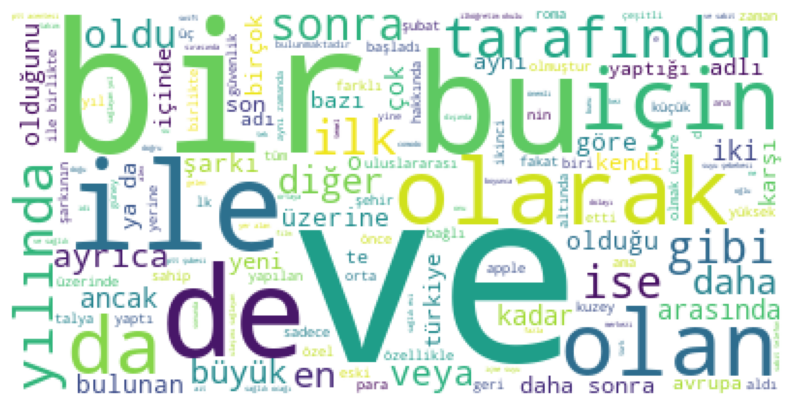

In [30]:
wc(trk,"white")

In [31]:
eng=df[df["language"]=="English"]["Text"]

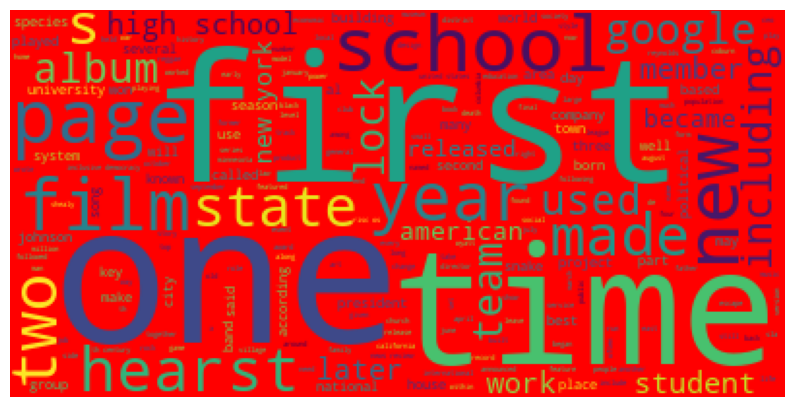

In [32]:
wc(eng,"red")

In [36]:
spn=df[df["language"]=="Spanish"]["Text"]

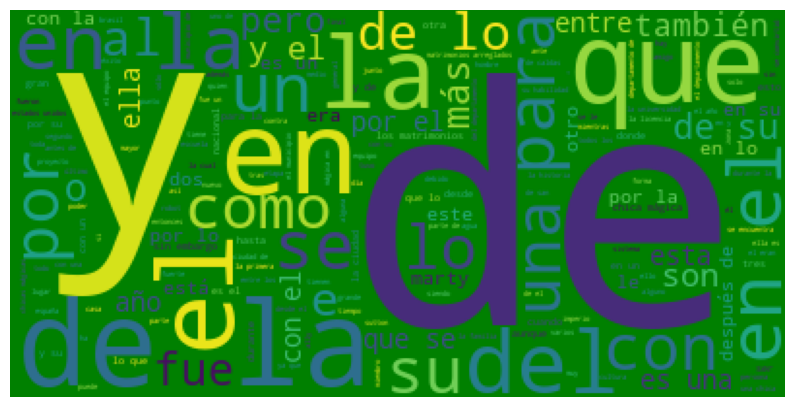

In [37]:
wc(spn,"green")

### Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
clf=Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier())])

In [46]:
x=df["Text"]
y=df["language"]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [50]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [51]:
y_pred=clf.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.9177272727272727

In [53]:
from sklearn.svm import SVC

In [54]:
svm=Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC())])

In [55]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [56]:
y_pred=svm.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred)

0.9520454545454545

In [58]:
accuracy_score(y_test,y_pred)

0.9520454545454545

<Axes: >

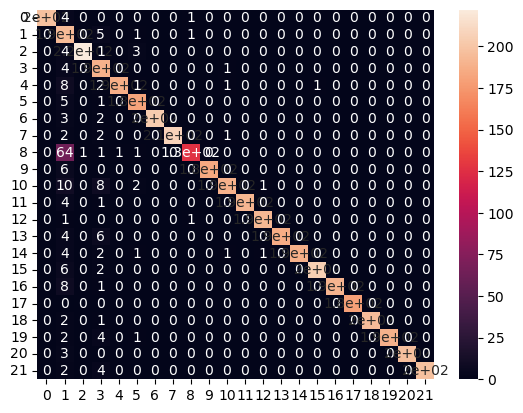

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       202
     Chinese       0.57      0.97      0.72       201
       Dutch       1.00      0.97      0.98       230
     English       0.81      0.97      0.89       194
    Estonian       0.99      0.94      0.96       200
      French       0.95      0.97      0.96       188
       Hindi       1.00      0.98      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.98      0.65      0.78       194
      Korean       1.00      0.97      0.98       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.97      0.99       196
   Portugese       0.99      0.99      0.99       194
      Pushto       1.00      0.95      0.97       196
    Romanian       1.00      0.95      0.98       197
     Russian       1.00      0.96      0.98       213
     Spanish       1.00      0.95      0.98       199
     Swedish       1.00    

In [74]:
test1=df[df["language"]=="Turkish"]["Text"].iloc[5]

In [70]:
df[df["language"]=="Turkish"]["Text"].iloc[5]

'toplumun büyük bir kısmı okuma yazma bilmediği için molla nasredin dergisi yazarları edebi dilin geliştirilmesinde halk diline yönelme gereğini savunmuşlardır dergi ülkenin geleceği açısından molla nasreddin ile pek çok konuda amaç birliği içerisinde olan füyûzat ile dil meselesinde ayrılmıştır füyûzat arapça- farsça tamlamalarla ve zaman zaman ağdalı bir osmanlı üslubuyla seçkin bir kesime hitap ederken molla nasreddin tamamen açık duru bir azerbaycan türkçesiyle ve sade bir üslupla topluma yönelik yayın yapmıştır'

In [75]:
print(svm.predict([test1]))

['Turkish']


In [76]:
test2=df[df["language"]=="Persian"]["Text"].iloc[5]

In [77]:
df[df["language"]=="Persian"]["Text"].iloc[5]

'راه\u200cها و وسایط نقلیه نیز دارای اهمیت است راه آهن سرتاسری ایران از خلیج فارس تا دریای خزر همچنین نگاه کنید به راه\u200cآهن مازندران راه آهن تهران به مشهد راه آهن تهران به تبریز تهران به کاشان راه آهن بندرعباس به تهران وراه آهن بندرعباس به سرخس که مشغول بهره برداریست و راه\u200cهای دیگری که در دست ساختمان است جاده\u200cهای شوسه همه شهرهای را بهم مربوط می\u200cسازد راه\u200cهای کشتیرانی در دریای خزر دریای عمان و خلیج فارس است راه\u200cهای هوایی میان اغلب کشورهای بزرگ جهان و شهرهای درجه اول ایران بر قرار است'

In [78]:
print(svm.predict([test2]))

['Persian']


<b>Veya Langdetect de kullananbiliriz</b>

In [64]:
#pip install langdetect

In [65]:
from langdetect import detect

In [79]:
detect(test1)

'tr'

In [81]:
detect(test2)

'fa'

In [82]:
import pickle

# Modeli kaydetme
with open('dil_tespiti.pkl', 'wb') as file:
    pickle.dump(svm, file)

Sonuc olarak veriyi kullanarak bir dil tanıma modeli olusturduk ve daha sonra bir uygulama yapmak üzere modelimizi kaydettik. 